### LIBRARY

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### DATASET

In [112]:
X_data = pd.read_csv("logisticX.csv", header=None).values
y_data = pd.read_csv("logisticY.csv", header=None).values

print("X_data shape:", X_data.shape)
print("y_data shape:", y_data.shape)

print("X_data:", X_data[:5])
print("y_data:", y_data[:5])


X_data shape: (100, 2)
y_data shape: (100, 1)
X_data: [[3.8915 4.2105]
 [3.6898 6.6051]
 [2.7763 7.5057]
 [3.1137 5.7724]
 [2.9251 5.4315]]
y_data: [[0]
 [0]
 [0]
 [0]
 [0]]


### DATA PREPROCESSING USING MIN-MAX SCALING

In [113]:
def min_max_scaling(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

X_data = min_max_scaling(X_data)

X_data = np.hstack((np.ones((X_data.shape[0], 1)), X_data))

### HYPERPARAMETERS

In [114]:
theta = np.zeros((X_data.shape[1], 1))
learning_rate = 0.1
iterations = 100

### SIGMOID FUNCTION

In [115]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### COST FUNCTION

In [116]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

### GRADIENT DESCENT

In [117]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        gradient = (1 / m) * np.dot(X.T, (sigmoid(np.dot(X, theta)) - y))
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

### TRAIN

In [118]:
theta_01, cost_history_01 = gradient_descent(X_data, y_data, theta, learning_rate, iterations)

### AFTER TRAINING

In [119]:
print(f"Cost after convergence: {cost_history_01[-1]}")
print(f"Learned parameters (theta): {theta_01.flatten()}")

Cost after convergence: 0.6054171650220601
Learned parameters (theta): [ 0.04814252  0.61466886 -0.70378494]


## PLOTS

In [120]:
def plot_cost_vs_iterations(cost_history, learning_rate, iterations, file_name=None):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=500)
    ax.plot(range(1, iterations + 1), cost_history, label=f"LEARNING RATE: {learning_rate}", linewidth=2)
    ax.set_xlabel("ITERATIONS", fontsize=16, fontweight='bold')
    ax.set_ylabel("COST", fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    legend = ax.legend(loc='upper right', fontsize=16, frameon=False)
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.tight_layout()
    if file_name:
        plt.savefig(file_name)
    plt.show()

### COST FUNCTION V/S ITERATION

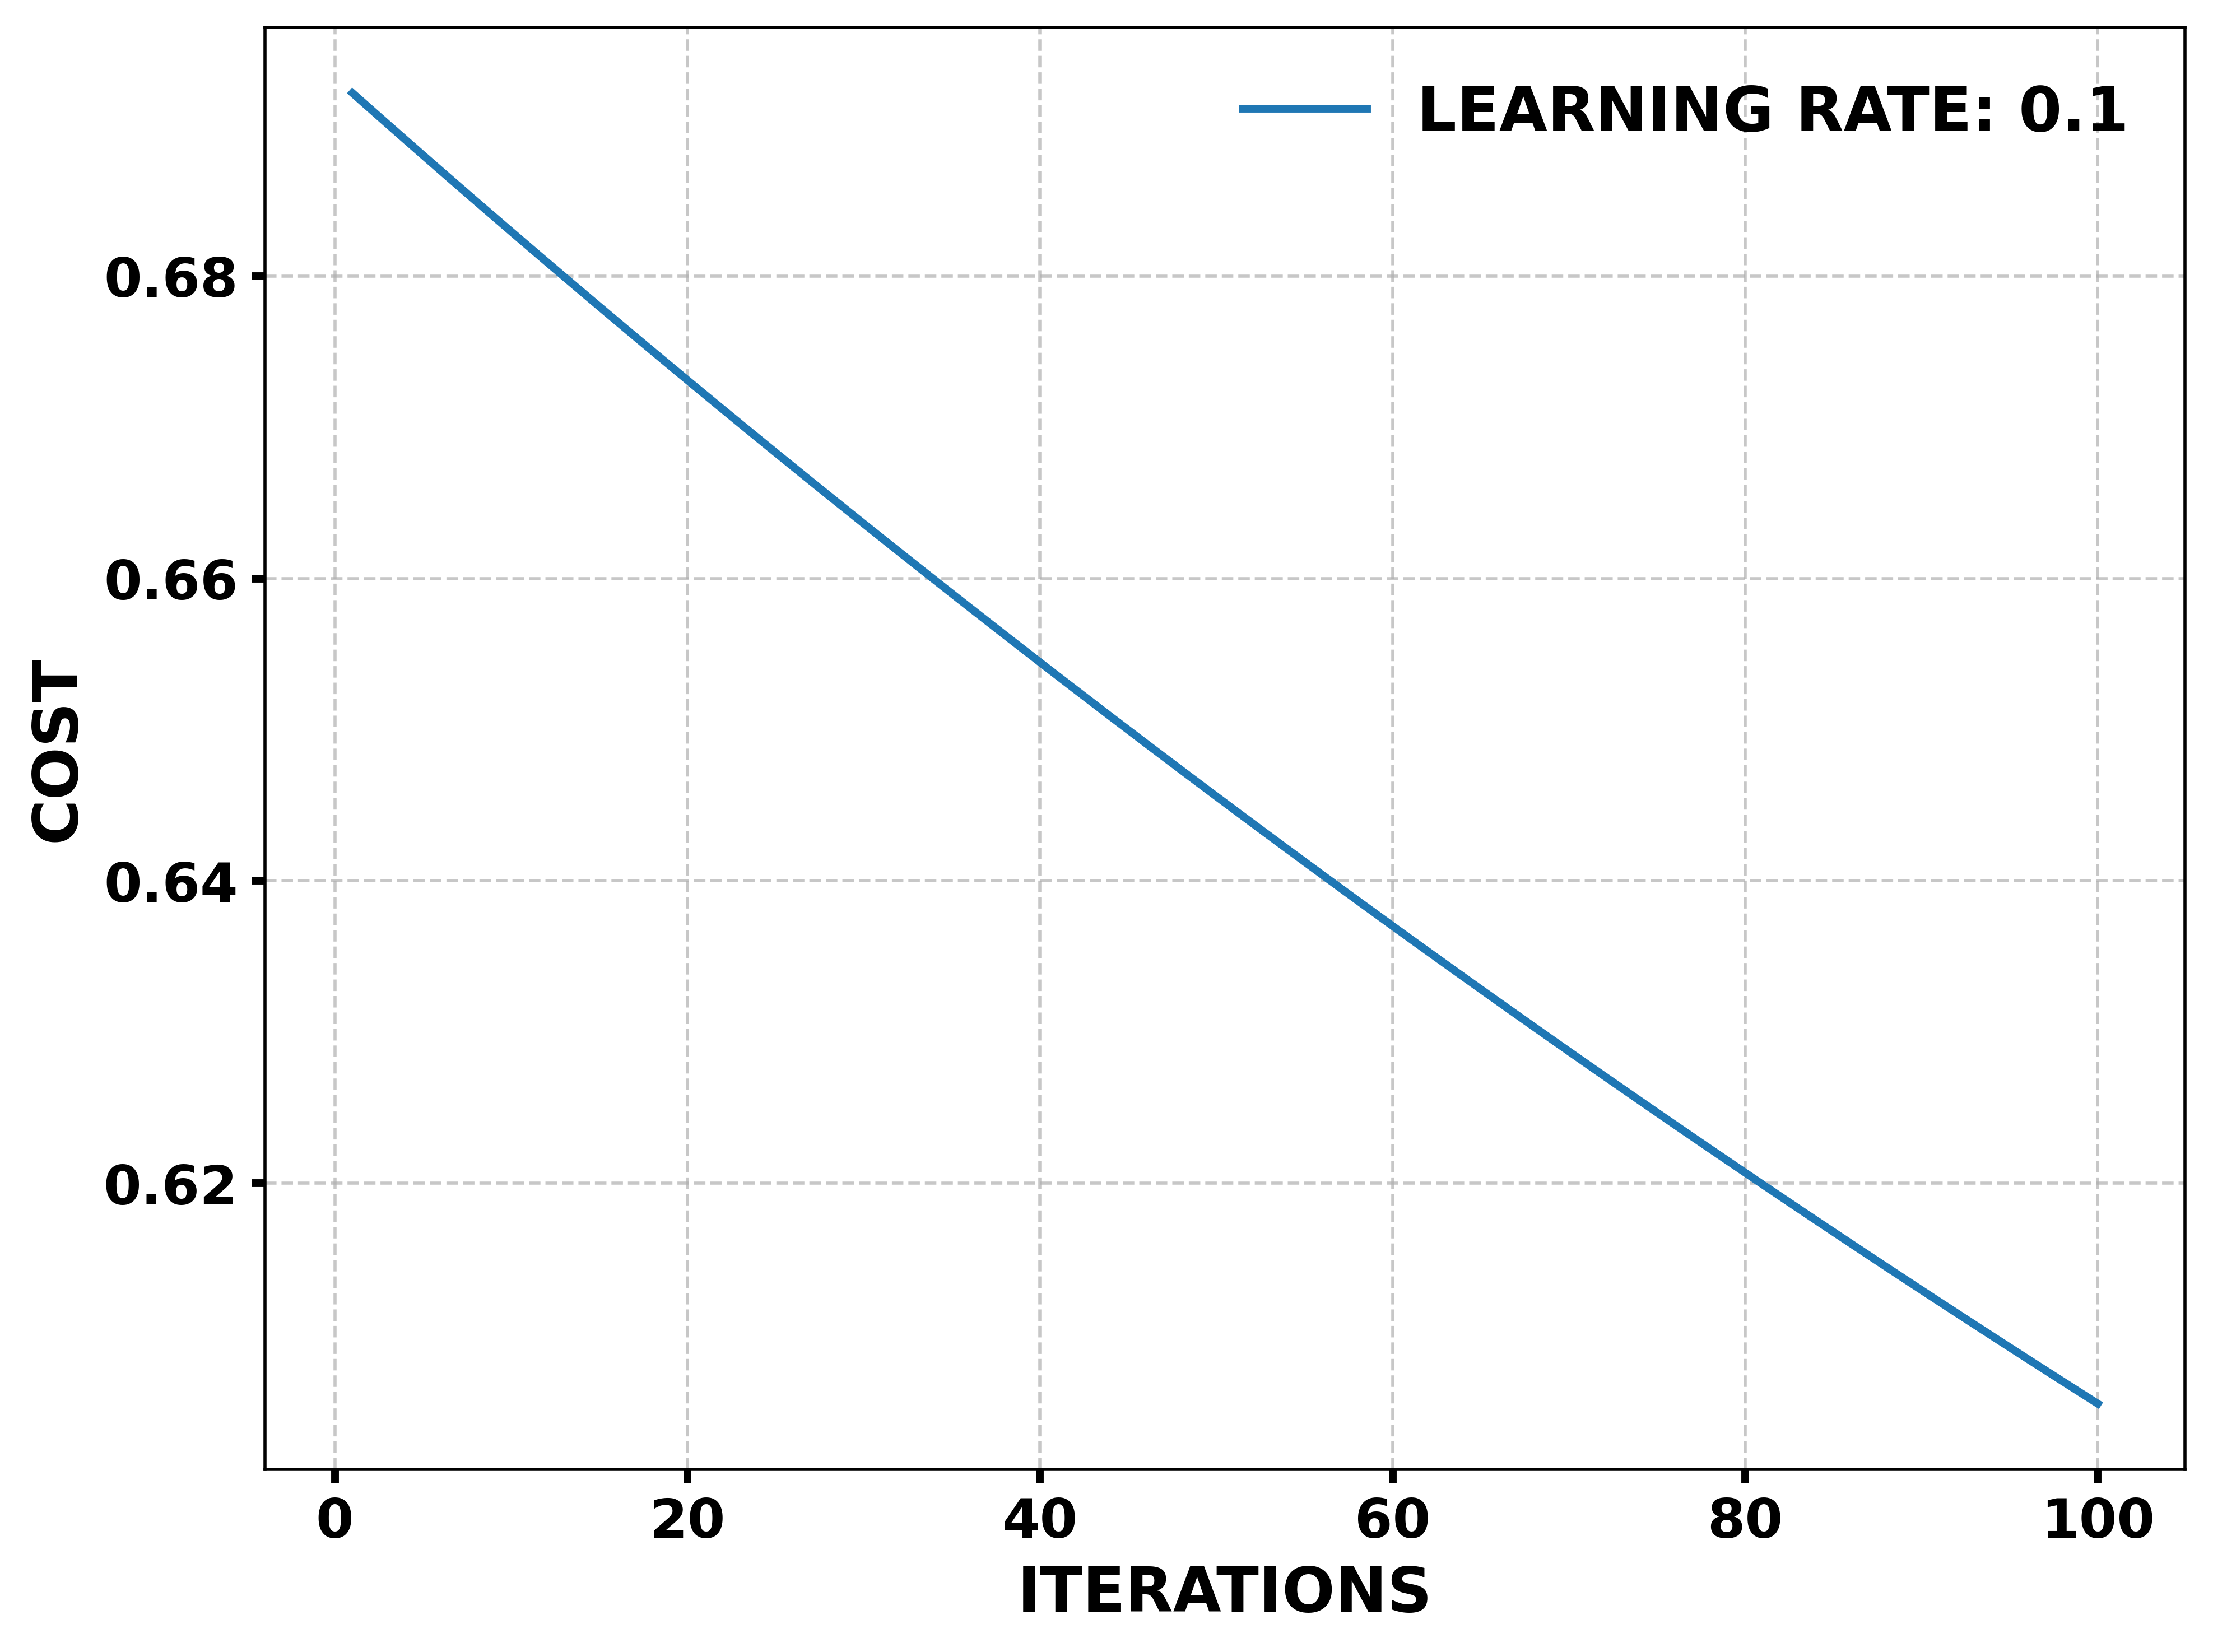

In [121]:
plot_cost_vs_iterations(
    cost_history_01, 
    0.1, 
    iterations, 
    r"C:\Users\KIIT\Documents\AI_LAB\LogisticRegression\COST_FUNCTION.png"
)

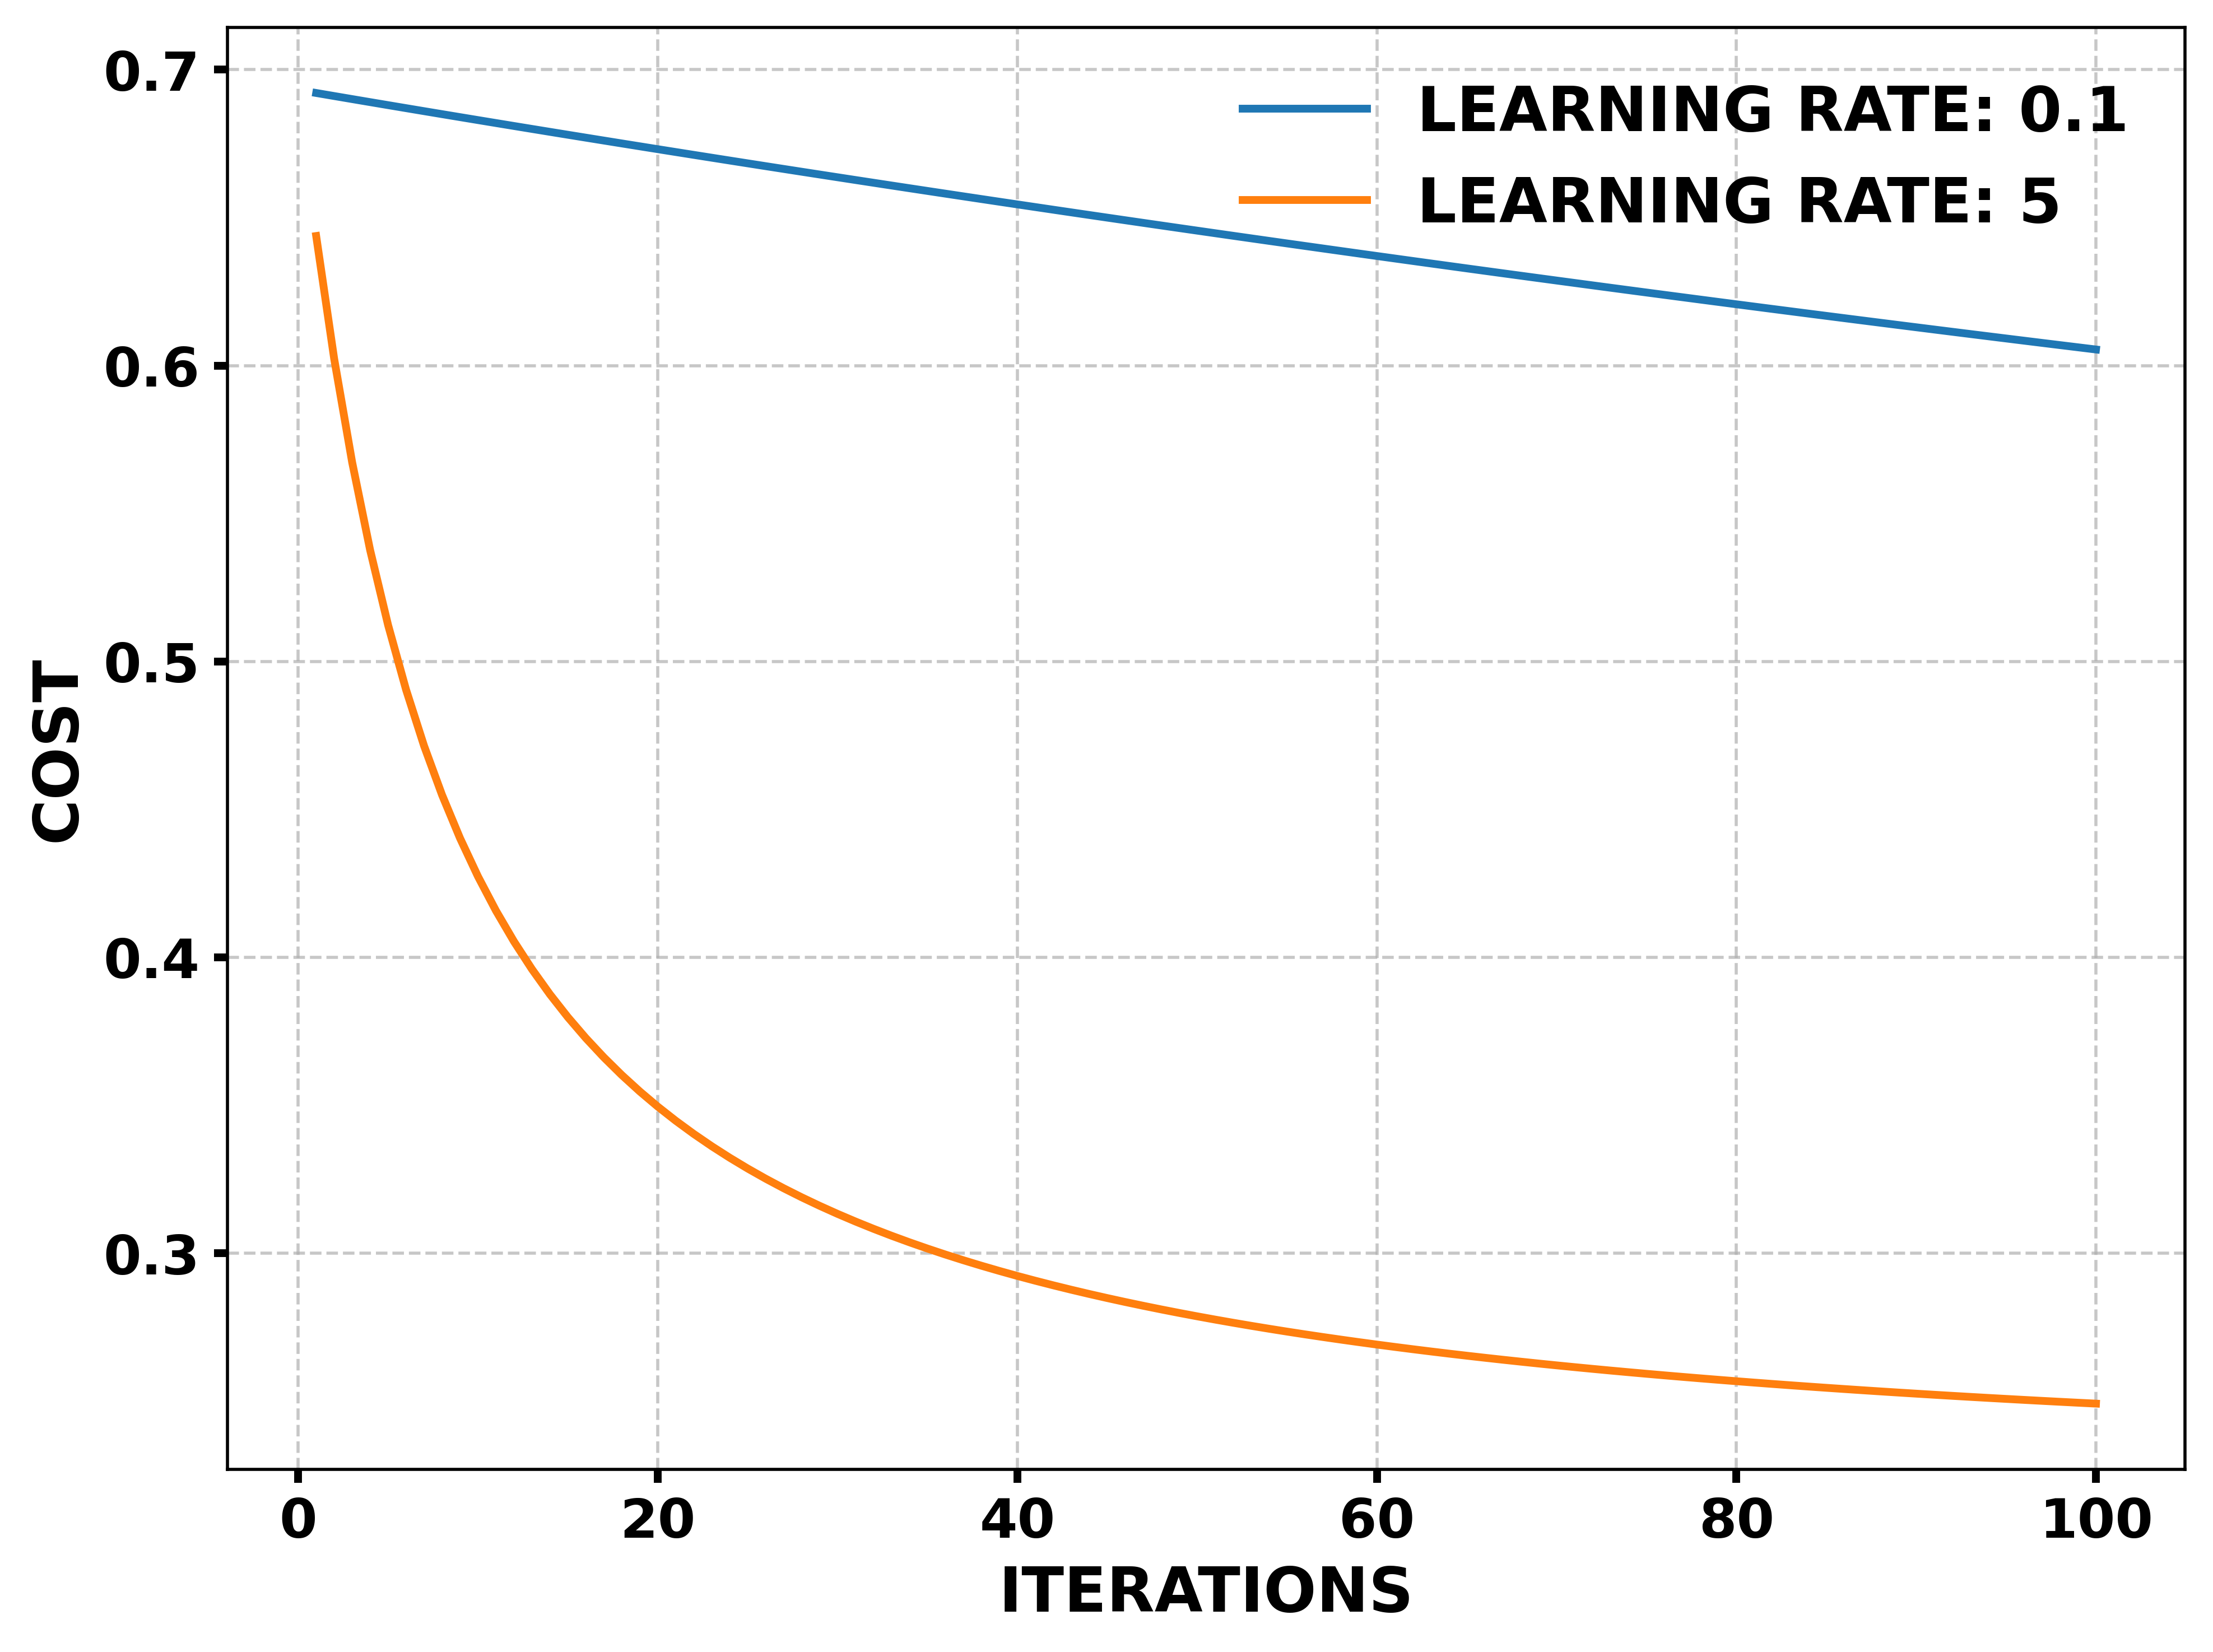

In [122]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=500)
ax.plot(range(1, 101), cost_history_01[:100], label="LEARNING RATE: 0.1", linewidth=2)
ax.plot(range(1, 101), cost_history_05, label="LEARNING RATE: 5", linewidth=2)
ax.set_xlabel("ITERATIONS", fontsize=16, fontweight='bold')
ax.set_ylabel("COST", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
ax.grid(True, linestyle='--', alpha=0.7)
legend = ax.legend(loc='upper right', fontsize=16, frameon=False)
for text in legend.get_texts():
    text.set_fontweight('bold')
plt.tight_layout()
plt.savefig(r"C:\Users\KIIT\Documents\AI_LAB\LogisticRegression\COST_COMPARISON.png")
plt.show()

### DATA SET AND DECISION BOUNDARY

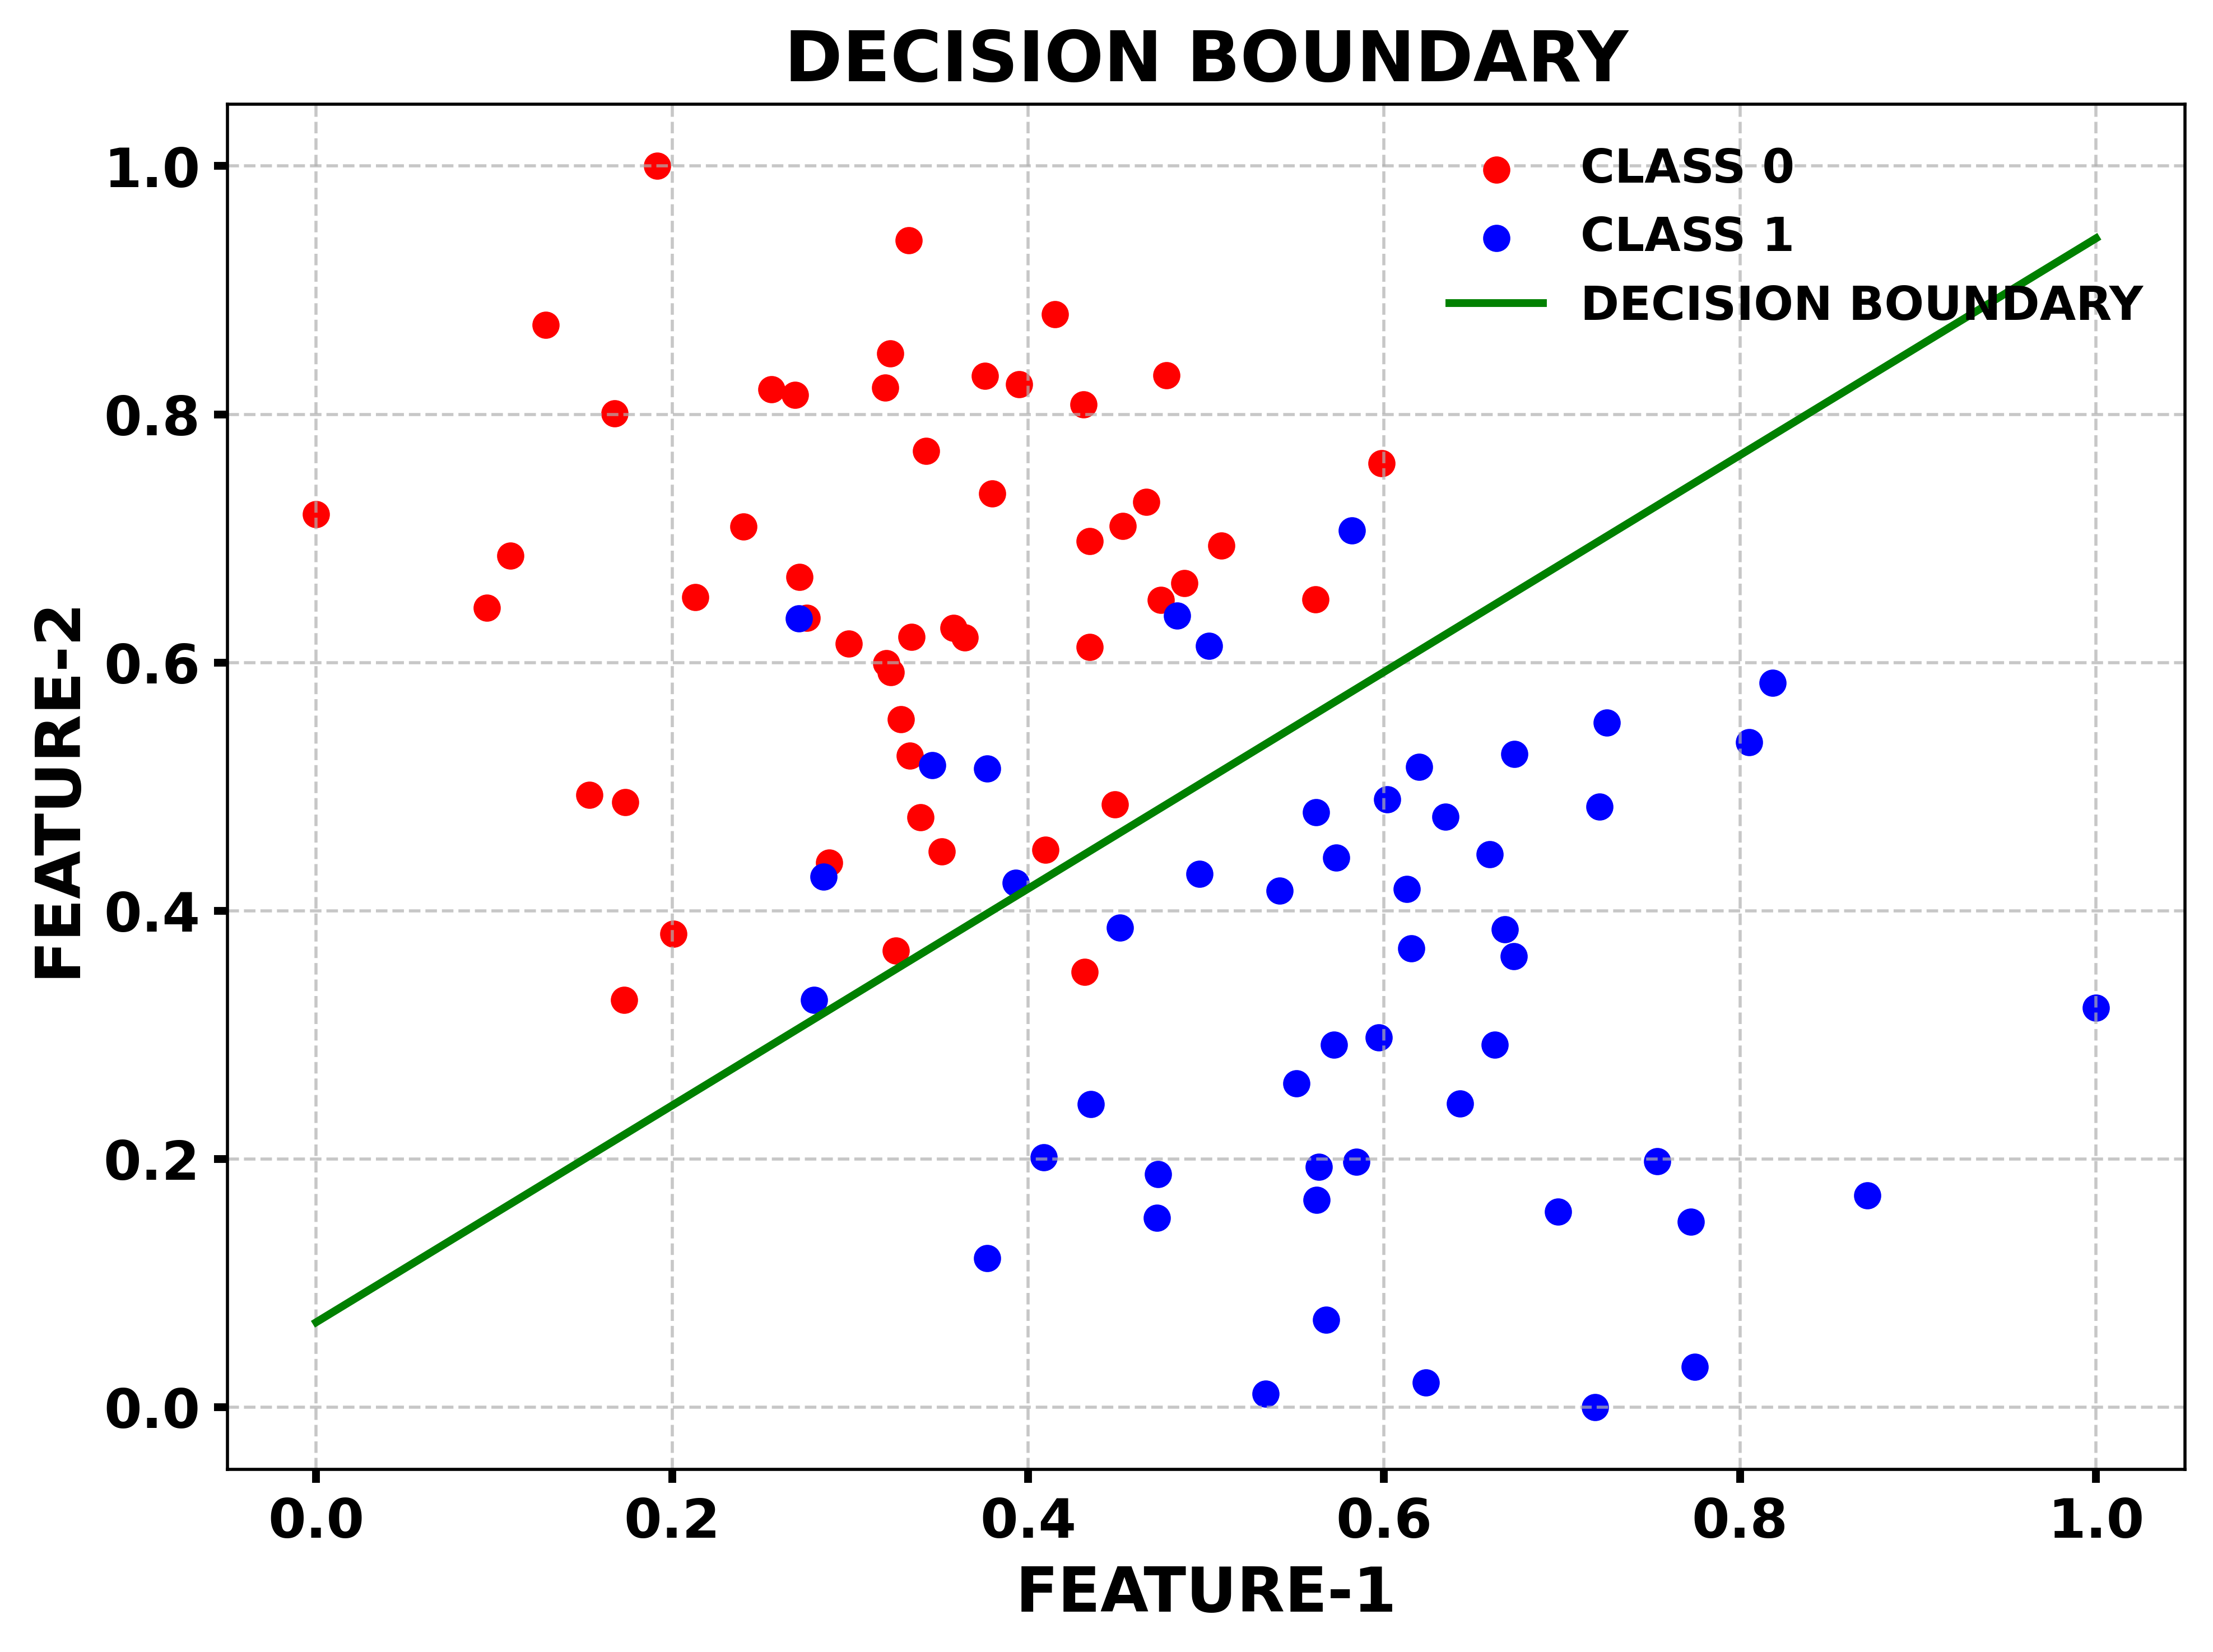

In [131]:
plt.figure(figsize=(8, 6), dpi=500)

label_class_1_shown = False
label_class_0_shown = False

for i in range(len(y_data)):
    if y_data[i] == 1:
        if not label_class_1_shown:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='blue', label='CLASS 1')
            label_class_1_shown = True
        else:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='blue')
    else:
        if not label_class_0_shown:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='red', label='CLASS 0')
            label_class_0_shown = True
        else:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='red')

x_vals = np.linspace(0, 1, 100)
y_vals = -(theta_01[0] + theta_01[1] * x_vals) / theta_01[2]
plt.plot(x_vals, y_vals, color='green', linewidth=2, label='DECISION BOUNDARY')

plt.xlabel("FEATURE-1", fontsize=16, fontweight='bold')
plt.ylabel("FEATURE-2", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.title("DECISION BOUNDARY", fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

legend = plt.legend(loc='upper right', fontsize=12, frameon=False)
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout()
plt.savefig(r"C:\Users\KIIT\Documents\AI_LAB\LogisticRegression\DECISION_BOUNDARY.png")
plt.show()

### CONFUSION MATRIX

In [132]:
def evaluate_model(X, y, theta):
    predictions = sigmoid(np.dot(X, theta)) >= 0.5
    tp = np.sum((predictions == 1) & (y == 1))
    tn = np.sum((predictions == 0) & (y == 0))
    fp = np.sum((predictions == 1) & (y == 0))
    fn = np.sum((predictions == 0) & (y == 1))

    accuracy = (tp + tn) / len(y)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score, np.array([[tp, fp], [fn, tn]])

accuracy, precision, recall, f1_score, confusion_matrix = evaluate_model(X_data, y_data, theta_01)

print("Confusion Matrix:")
print(confusion_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Confusion Matrix:
[[41  1]
 [ 9 49]]
Accuracy: 0.90
Precision: 0.98
Recall: 0.82
F1 Score: 0.89
